ИИБАмд-11 Варкентин Мария. Лабораторная работа по ИИАС №1.
1. Руководитель: Гуськов Г.Ю.
Примерная тема магистерской: Обнаружение депрессии из текстов пользователей в социальных сетях.
2. Несколько задач для решения в рамках дисциплины:
* Изучить pandas и numpy;
* Изучить методы обработки есстественного языка: токенизация, стемминг, word augmentation и др.
3. Датасет с названием "Depression student dataset" найден на Kaggle
4. Выполнить следующие операции по работе с данными:
* загрузка и сохранение данных;

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import kagglehub
# Download latest version
path = kagglehub.dataset_download("ikynahidwin/depression-student-dataset")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/Depression Student Dataset.csv")
df.to_csv("data\Depression Student Dataset.csv")

100%|██████████| 4.25k/4.25k [00:00<00:00, 6.67MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ikynahidwin/depression-student-dataset/versions/1


* получение сведений о данных;

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

* Вывод отдельных строки и столбцов из таблицы

In [ ]:
# столбец Age
print(df["Age"])
# столбец Depression
print(df["Depression"])
# первые 3 строки датафрейма
print(df.head(3))
# строка 100 столбцы Age, Gender, Depression
print(df.loc[100, ["Age", "Gender", "Depression"]])

0      28
1      28
2      25
3      23
4      31
       ..
497    26
498    24
499    23
500    33
501    18
Name: Age, Length: 502, dtype: int64
0       No
1       No
2      Yes
3       No
4       No
      ... 
497    Yes
498    Yes
499     No
500     No
501    Yes
Name: Depression, Length: 502, dtype: object
  Gender  Age  Academic Pressure  Study Satisfaction Sleep Duration  \
0   Male   28                2.0                 4.0      7-8 hours   
1   Male   28                4.0                 5.0      5-6 hours   
2   Male   25                1.0                 3.0      5-6 hours   

  Dietary Habits Have you ever had suicidal thoughts ?  Study Hours  \
0       Moderate                                   Yes            9   
1        Healthy                                   Yes            7   
2      Unhealthy                                   Yes           10   

   Financial Stress Family History of Mental Illness Depression  
0                 2                              Ye

* группировка и агрегация данных в таблице;

In [ ]:
# смотрим уникальные значения столбца "Sleep Duration"
sleep_values = df["Sleep Duration"].unique()
print(sleep_values)

# считаем количество строк, соответсвующих каждому значению "Sleep Duration"
sleep_total = 0
for sleep_value in sleep_values:
    count = df[df["Sleep Duration"] == sleep_value].shape[0]
    sleep_total += count
    print(sleep_value, "count =", count)
# считаем сколько всего строк содержат значения в столбце "Sleep Duration"
print("Total count =", sleep_total)

# группируем строки по значениям столбцов "Have you ever had suicidal thoughts ?"
# и "Depression" и считаем количество
print(df.groupby(["Have you ever had suicidal thoughts ?", "Depression"]).size().reset_index(name="Count"))

['7-8 hours' '5-6 hours' 'More than 8 hours' 'Less than 5 hours']
7-8 hours count = 128
5-6 hours count = 123
More than 8 hours count = 128
Less than 5 hours count = 123
Total count = 502
  Have you ever had suicidal thoughts ? Depression  Count
0                                    No         No    179
1                                    No        Yes     63
2                                   Yes         No     71
3                                   Yes        Yes    189


* сортировка данных в таблице;

In [ ]:
# сортируем датафрейм по возрасту (только столбцы "Gender", "Age", "Depression")
sorted_df = df[["Gender", "Age", "Depression"]].sort_values(by="Age")
# выводим первые 5 строк
print(sorted_df.head())
# и последние 5 строк отсортированного датафрейма
print(sorted_df.tail())

     Gender  Age Depression
501    Male   18        Yes
85     Male   18        Yes
255    Male   18        Yes
254    Male   18         No
325  Female   18        Yes
     Gender  Age Depression
439  Female   34         No
249  Female   34         No
473  Female   34         No
275    Male   34         No
205  Female   34        Yes


* удаление строк/столбцов;

In [ ]:
# удаляем столбец "Gender"
print(sorted_df.drop("Gender",axis=1).head())
# удаляем все записи (строки) о 18-летних
print(sorted_df.drop(sorted_df[sorted_df["Age"] == 18].index, axis=0).head())

     Age Depression
501   18        Yes
85    18        Yes
255   18        Yes
254   18         No
325   18        Yes
     Gender  Age Depression
261  Female   19         No
104    Male   19         No
105  Female   19        Yes
246  Female   19         No
129  Female   19        Yes


* удаление строк с пустыми значениями;

In [ ]:
data = sorted_df.copy()

# Добавляем строку с пустым значением. Способ №1
new_row = pd.DataFrame({"Gender" : ["Male"], "Depression" : ["Yes"]})
data = pd.concat([data, new_row], ignore_index=True)
# Добавляем строку с пустым значением. Способ №2
data.loc[len(data)] = ["Female", np.nan, "No"]

print(data)
# удаление строк с пустыми значениями
data.dropna(subset=["Age"], inplace=True)
print(data)

     Gender   Age Depression
0      Male  18.0        Yes
1      Male  18.0        Yes
2      Male  18.0        Yes
3      Male  18.0         No
4    Female  18.0        Yes
..      ...   ...        ...
499  Female  34.0         No
500    Male  34.0         No
501  Female  34.0        Yes
502    Male   NaN        Yes
503  Female   NaN         No

[504 rows x 3 columns]
     Gender   Age Depression
0      Male  18.0        Yes
1      Male  18.0        Yes
2      Male  18.0        Yes
3      Male  18.0         No
4    Female  18.0        Yes
..      ...   ...        ...
497  Female  34.0         No
498  Female  34.0         No
499  Female  34.0         No
500    Male  34.0         No
501  Female  34.0        Yes

[502 rows x 3 columns]


* заполнение пустых значений на основе существующих данных.

In [ ]:
# добавление строки с пустым значением Age
data.loc[len(data)] = ["Male", np.nan, "Yes"]

# заполнение пустых значений на основе предыдущих
data = data.ffill()
data.tail()
#data = data.drop(axis=0, index=len(data)-1)

,Gender,Age,Depression
498,Female,34.0,No
499,Female,34.0,No
500,Male,34.0,No
501,Female,34.0,Yes
502,Male,34.0,Yes


5. Разобраться с основными возможностями для визуализации данных:

* линейная диаграмма (plot);

<Axes: xlabel='Study Hours'>

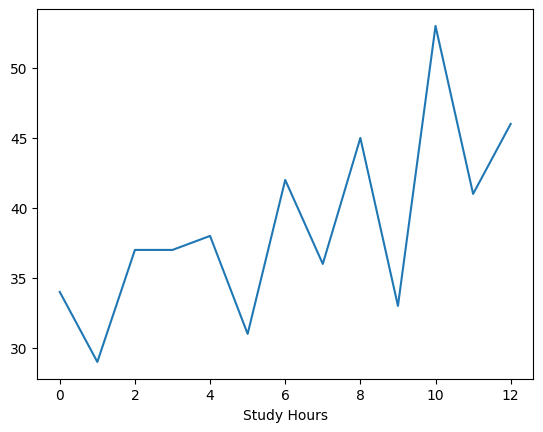

In [ ]:
plot_data = df[["Age", "Gender", "Study Hours", "Financial Stress", "Depression"]].copy()
plot_data.groupby(["Study Hours"]).size().plot.line()

* гистограмма (hist);

<Axes: ylabel='Frequency'>

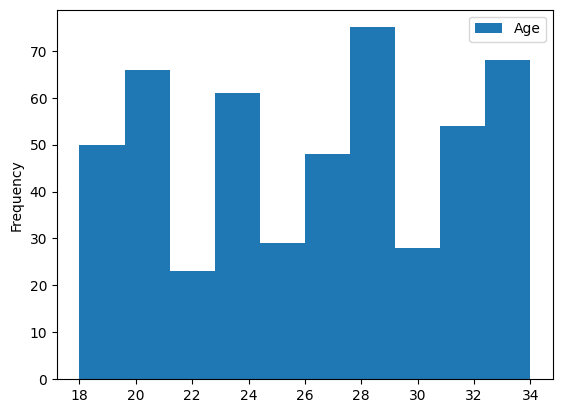

In [ ]:
# строим гистограмму
plot_data.plot.hist(column='Age')

* столбчатая диаграмма (bar);

<Axes: xlabel='Gender'>

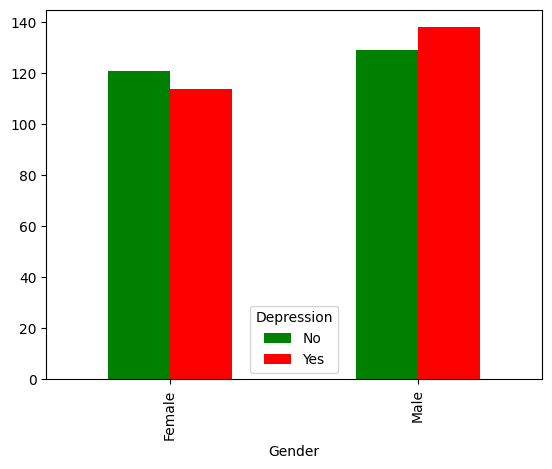

In [ ]:
plot_data.groupby(["Gender", "Depression"]).size().unstack().plot.bar(color=["green", "red"])

* ящик с усами (box);

<Axes: title={'center': 'Financial Stress'}, xlabel='Depression'>

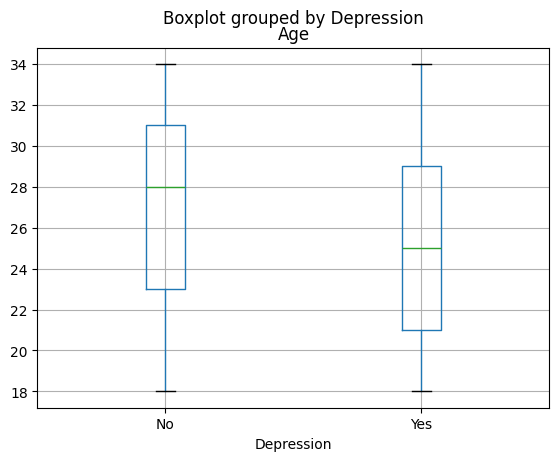

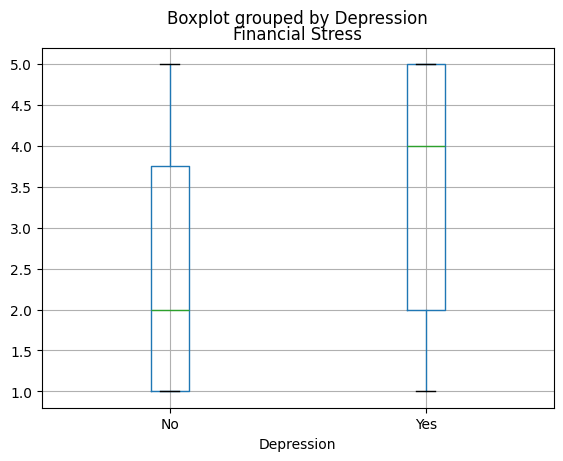

In [ ]:
plot_data.boxplot(column="Age", by="Depression")
plot_data.boxplot(column="Financial Stress", by="Depression")

* диаграмма рассеяния (scatter).

<Axes: xlabel='Age', ylabel='Study Hours'>

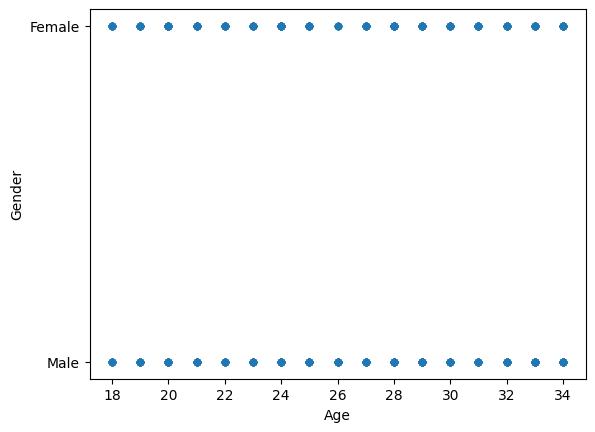

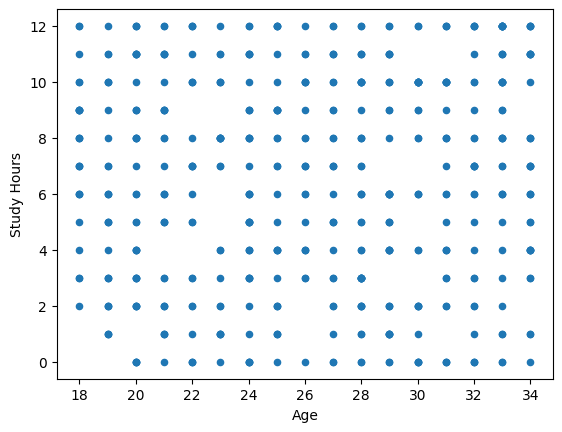

In [ ]:
plot_data.plot.scatter(x="Age", y="Gender")
plot_data.plot.scatter(x="Age", y="Study Hours")